# Import library

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates

# Merging data into one file

In [22]:
files = [file for file in os.listdir('./WeatherAnalysis/')]   # find all file names
all_year_data = pd.DataFrame()   # empty data frame to store all file data

for file in files:
    #print(file)
    df = pd.read_csv("./WeatherAnalysis/" + file, encoding = 'unicode_escape') # read each file content
    all_year_data = pd.concat([all_year_data, df])  # concatenate each file content together
    
all_year_data.to_csv("all_data.csv", index = False) # save all data into one .csv file

all_data = pd.read_csv('all_data.csv')  # assign all data from the csv file to a data frame

# Change column names
all_data.columns = ['Station Name', 'Date', 'Air Temp Min', 'Air Temp Min Source Flag', 
                    'Air Temp Min Record Completeness', 'Air Temp Max', 'Air Temp Max Source Flag',
                    'Air Temp Max Record Completeness', 'Air Temp Avg', 'Air Temp Avg Source Flag', 
                    'Air Temp Avg Record Completeness', 'Relative Humidity Avg', 'Relative Humidity Avg Source Flag', 
                    'Relative Humidity Avg Record Completeness', 'Precip Accumulated', 'Precip Accumulated Source Flag',
                    'Precip Accumulated Comment', 'Precip', 'Precip Source Flag', 'Precip Comment', 
                    'Wind Speed 10 m Avg', 'Wind Speed 10 m Avg Source Flag', 'Wind Speed 10 m Avg Record Completeness',
                    'Wind Dir 10 m Avg', 'Wind Dir 10 m Avg Source Flag', 'Wind Dir 10 m Avg Record Completeness', 
                    'Precip Long Term', 'Precip Long Term Source Flag', 'Air Temp Avg Long Term', 
                    'Air Temp Avg Long Term Source Flag', 'Air Temp Avg Long Term Record Completeness',
                    'Air Temp Avg Min Long Term', 'Air Temp Avg Long Term Source Flag', 
                    'Air Temp Avg Min Long Term Record Completeness', 'Air Temp Avg Max Long Term', 
                    'Air Temp Avg Max Long Term Source Flag', 'Air Temp Avg Max Long Term Record Completeness', 
                    'Frost Probability', 'Frost Probability Source Flag', 'Frost Probability Record Completeness', 
                    'ET Std-Grass', 'ET Std-Grass Source Flag', 'ET Std-Grass Comment', 'Growing Degree Days', 
                    'Growing Degree Days Source Flag', 'Corn Heat Units', 'Corn Heat Units Source Flag', 
                    'Potato Heat Units', 'Potato Heat Units Source Flag']
all_data.head()
    

,Station Name,Date,Air Temp Min,Air Temp Min Source Flag,Air Temp Min Record Completeness,Air Temp Max,Air Temp Max Source Flag,Air Temp Max Record Completeness,Air Temp Avg,Air Temp Avg Source Flag,...,Frost Probability Record Completeness,ET Std-Grass,ET Std-Grass Source Flag,ET Std-Grass Comment,Growing Degree Days,Growing Degree Days Source Flag,Corn Heat Units,Corn Heat Units Source Flag,Potato Heat Units,Potato Heat Units Source Flag
0,Calgary Springbank A,01-January-2017,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,...,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,UNAVAILBLE,NaN,UNAVAILBLE
1,Calgary Springbank A,02-January-2017,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,...,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,UNAVAILBLE,NaN,UNAVAILBLE
2,Calgary Springbank A,03-January-2017,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,...,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,UNAVAILBLE,NaN,UNAVAILBLE
3,Calgary Springbank A,04-January-2017,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,...,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,UNAVAILBLE,NaN,UNAVAILBLE
4,Calgary Springbank A,05-January-2017,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,...,NaN,NaN,UNAVAILBLE,NaN,NaN,UNAVAILBLE,NaN,UNAVAILBLE,NaN,UNAVAILBLE


#  Clean up data

## Drop rows of  'NaN'

In [23]:
nan_df = all_data.dropna(subset =['Air Temp Min'])
nan_df.head()

all_data = all_data[all_data['Air Temp Min'].notnull()]
all_data.head(100)


,Station Name,Date,Air Temp Min,Air Temp Min Source Flag,Air Temp Min Record Completeness,Air Temp Max,Air Temp Max Source Flag,Air Temp Max Record Completeness,Air Temp Avg,Air Temp Avg Source Flag,...,Frost Probability Record Completeness,ET Std-Grass,ET Std-Grass Source Flag,ET Std-Grass Comment,Growing Degree Days,Growing Degree Days Source Flag,Corn Heat Units,Corn Heat Units Source Flag,Potato Heat Units,Potato Heat Units Source Flag
207,Calgary Springbank A,27-July-2017,7.7,ACTUAL,100.0,31.8,ACTUAL,100.0,20.7,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,14.8,COMPUTED,19.3,COMPUTED,6.1,COMPUTED
208,Calgary Springbank A,28-July-2017,9.9,ACTUAL,100.0,27.6,ACTUAL,100.0,18.9,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,28.5,COMPUTED,40.6,COMPUTED,13.6,COMPUTED
209,Calgary Springbank A,29-July-2017,7.2,ACTUAL,100.0,28.0,ACTUAL,100.0,18.0,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,41.1,COMPUTED,59.4,COMPUTED,20.0,COMPUTED
210,Calgary Springbank A,30-July-2017,7.7,ACTUAL,100.0,25.5,ACTUAL,100.0,17.6,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,52.7,COMPUTED,78.1,COMPUTED,26.9,COMPUTED
211,Calgary Springbank A,31-July-2017,7.0,ACTUAL,100.0,24.7,ACTUAL,100.0,16.3,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,63.6,COMPUTED,95.9,COMPUTED,33.4,COMPUTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Calgary Springbank A,30-October-2017,-12.6,ACTUAL,100.0,9.5,ACTUAL,100.0,-1.7,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,617.7,COMPUTED,823.0,COMPUTED,297.8,COMPUTED
303,Calgary Springbank A,31-October-2017,-5.4,ACTUAL,100.0,5.8,ACTUAL,100.0,0.4,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,617.7,COMPUTED,823.0,COMPUTED,297.8,COMPUTED
304,Calgary Springbank A,01-November-2017,-6.7,ACTUAL,100.0,1.5,ACTUAL,100.0,-3.0,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,617.7,COMPUTED,823.0,COMPUTED,297.8,COMPUTED
305,Calgary Springbank A,02-November-2017,-14.5,ACTUAL,100.0,-6.7,ACTUAL,100.0,-10.7,AGGREGATED,...,NaN,NaN,UNAVAILBLE,NaN,617.7,COMPUTED,823.0,COMPUTED,297.8,COMPUTED


# Augment data with additional columns

## Task 1: Add month and year column

In [24]:
# use .apply()
def get_month(date):
    return date.split('-')[1]

def get_year(date):
    return date.split('-')[2]
    

all_data['Month'] = all_data['Date'].apply(lambda x: get_month(x))

all_data['Year'] = all_data['Date'].apply(lambda x: get_year(x))
                                           
all_data.head(50)


,Station Name,Date,Air Temp Min,Air Temp Min Source Flag,Air Temp Min Record Completeness,Air Temp Max,Air Temp Max Source Flag,Air Temp Max Record Completeness,Air Temp Avg,Air Temp Avg Source Flag,...,ET Std-Grass Source Flag,ET Std-Grass Comment,Growing Degree Days,Growing Degree Days Source Flag,Corn Heat Units,Corn Heat Units Source Flag,Potato Heat Units,Potato Heat Units Source Flag,Month,Year
207,Calgary Springbank A,27-July-2017,7.7,ACTUAL,100.0,31.8,ACTUAL,100.0,20.7,AGGREGATED,...,UNAVAILBLE,NaN,14.8,COMPUTED,19.3,COMPUTED,6.1,COMPUTED,July,2017
208,Calgary Springbank A,28-July-2017,9.9,ACTUAL,100.0,27.6,ACTUAL,100.0,18.9,AGGREGATED,...,UNAVAILBLE,NaN,28.5,COMPUTED,40.6,COMPUTED,13.6,COMPUTED,July,2017
209,Calgary Springbank A,29-July-2017,7.2,ACTUAL,100.0,28.0,ACTUAL,100.0,18.0,AGGREGATED,...,UNAVAILBLE,NaN,41.1,COMPUTED,59.4,COMPUTED,20.0,COMPUTED,July,2017
210,Calgary Springbank A,30-July-2017,7.7,ACTUAL,100.0,25.5,ACTUAL,100.0,17.6,AGGREGATED,...,UNAVAILBLE,NaN,52.7,COMPUTED,78.1,COMPUTED,26.9,COMPUTED,July,2017
211,Calgary Springbank A,31-July-2017,7.0,ACTUAL,100.0,24.7,ACTUAL,100.0,16.3,AGGREGATED,...,UNAVAILBLE,NaN,63.6,COMPUTED,95.9,COMPUTED,33.4,COMPUTED,July,2017
212,Calgary Springbank A,01-August-2017,10.2,ACTUAL,100.0,19.9,ACTUAL,100.0,13.8,AGGREGATED,...,UNAVAILBLE,NaN,73.6,COMPUTED,113.4,COMPUTED,40.9,COMPUTED,August,2017
213,Calgary Springbank A,02-August-2017,7.8,ACTUAL,100.0,21.3,ACTUAL,100.0,14.4,AGGREGATED,...,UNAVAILBLE,NaN,83.2,COMPUTED,130.0,COMPUTED,47.4,COMPUTED,August,2017
214,Calgary Springbank A,03-August-2017,3.8,ACTUAL,100.0,28.2,ACTUAL,100.0,16.5,AGGREGATED,...,UNAVAILBLE,NaN,94.2,COMPUTED,146.3,COMPUTED,53.1,COMPUTED,August,2017
215,Calgary Springbank A,04-August-2017,9.2,ACTUAL,100.0,20.2,ACTUAL,100.0,14.7,AGGREGATED,...,UNAVAILBLE,NaN,103.9,COMPUTED,163.3,COMPUTED,60.2,COMPUTED,August,2017
216,Calgary Springbank A,05-August-2017,8.1,ACTUAL,100.0,19.4,ACTUAL,100.0,13.2,AGGREGATED,...,UNAVAILBLE,NaN,112.6,COMPUTED,178.6,COMPUTED,66.5,COMPUTED,August,2017


## Task 2: add new column for new format of year

In [25]:
# convert month name to integer
def m_to_n(x):
    return datetime.strptime(x, '%B').month

all_data['nMonth'] = all_data['Month'].apply(lambda x: m_to_n(x))

all_data.head(50)


,Station Name,Date,Air Temp Min,Air Temp Min Source Flag,Air Temp Min Record Completeness,Air Temp Max,Air Temp Max Source Flag,Air Temp Max Record Completeness,Air Temp Avg,Air Temp Avg Source Flag,...,ET Std-Grass Comment,Growing Degree Days,Growing Degree Days Source Flag,Corn Heat Units,Corn Heat Units Source Flag,Potato Heat Units,Potato Heat Units Source Flag,Month,Year,nMonth
207,Calgary Springbank A,27-July-2017,7.7,ACTUAL,100.0,31.8,ACTUAL,100.0,20.7,AGGREGATED,...,NaN,14.8,COMPUTED,19.3,COMPUTED,6.1,COMPUTED,July,2017,7
208,Calgary Springbank A,28-July-2017,9.9,ACTUAL,100.0,27.6,ACTUAL,100.0,18.9,AGGREGATED,...,NaN,28.5,COMPUTED,40.6,COMPUTED,13.6,COMPUTED,July,2017,7
209,Calgary Springbank A,29-July-2017,7.2,ACTUAL,100.0,28.0,ACTUAL,100.0,18.0,AGGREGATED,...,NaN,41.1,COMPUTED,59.4,COMPUTED,20.0,COMPUTED,July,2017,7
210,Calgary Springbank A,30-July-2017,7.7,ACTUAL,100.0,25.5,ACTUAL,100.0,17.6,AGGREGATED,...,NaN,52.7,COMPUTED,78.1,COMPUTED,26.9,COMPUTED,July,2017,7
211,Calgary Springbank A,31-July-2017,7.0,ACTUAL,100.0,24.7,ACTUAL,100.0,16.3,AGGREGATED,...,NaN,63.6,COMPUTED,95.9,COMPUTED,33.4,COMPUTED,July,2017,7
212,Calgary Springbank A,01-August-2017,10.2,ACTUAL,100.0,19.9,ACTUAL,100.0,13.8,AGGREGATED,...,NaN,73.6,COMPUTED,113.4,COMPUTED,40.9,COMPUTED,August,2017,8
213,Calgary Springbank A,02-August-2017,7.8,ACTUAL,100.0,21.3,ACTUAL,100.0,14.4,AGGREGATED,...,NaN,83.2,COMPUTED,130.0,COMPUTED,47.4,COMPUTED,August,2017,8
214,Calgary Springbank A,03-August-2017,3.8,ACTUAL,100.0,28.2,ACTUAL,100.0,16.5,AGGREGATED,...,NaN,94.2,COMPUTED,146.3,COMPUTED,53.1,COMPUTED,August,2017,8
215,Calgary Springbank A,04-August-2017,9.2,ACTUAL,100.0,20.2,ACTUAL,100.0,14.7,AGGREGATED,...,NaN,103.9,COMPUTED,163.3,COMPUTED,60.2,COMPUTED,August,2017,8
216,Calgary Springbank A,05-August-2017,8.1,ACTUAL,100.0,19.4,ACTUAL,100.0,13.2,AGGREGATED,...,NaN,112.6,COMPUTED,178.6,COMPUTED,66.5,COMPUTED,August,2017,8


# Solve the Questions

## Q1: What is the coldest month and hottest month in Calgary?

In [26]:
all_data.groupby('nMonth').mean()


,Air Temp Min,Air Temp Min Record Completeness,Air Temp Max,Air Temp Max Record Completeness,Air Temp Avg,Air Temp Avg Record Completeness,Relative Humidity Avg,Relative Humidity Avg Record Completeness,Precip Accumulated,Precip,...,Air Temp Avg Long Term Record Completeness,Air Temp Avg Min Long Term,Air Temp Avg Min Long Term Record Completeness,Air Temp Avg Max Long Term,Air Temp Avg Max Long Term Record Completeness,Frost Probability,Frost Probability Record Completeness,ET Std-Grass,ET Std-Grass Comment,Potato Heat Units
nMonth,,,,,,,,,,,,,,,,,,,,,
1,-13.776882,100.000000,-0.139785,100.000000,-6.648925,100.000000,66.295699,100.000000,58.570238,0.127381,...,NaN,-13.041935,NaN,-1.351613,NaN,100.000000,NaN,NaN,NaN,0.308602
2,-17.813018,99.901775,-4.455030,99.901775,-10.399408,99.901183,67.563905,100.000000,67.478481,0.502532,...,NaN,-12.172781,NaN,-0.192308,NaN,100.000000,NaN,NaN,NaN,1.576923
3,-9.927419,99.731183,3.664516,99.731183,-3.106989,99.753226,66.812903,99.977419,75.044318,0.312500,...,NaN,-8.558065,NaN,3.625806,NaN,100.000000,NaN,NaN,NaN,2.660215
4,-6.142778,99.746111,8.132222,99.746111,1.253333,99.746111,60.805556,99.746111,83.674444,0.485556,...,NaN,-3.080000,NaN,9.736667,NaN,100.000000,NaN,NaN,NaN,12.775556
5,1.086559,99.955376,15.561828,99.955376,8.645699,99.955376,60.831183,99.955376,110.835484,1.425806,...,NaN,1.938710,NaN,15.219355,NaN,76.290323,NaN,NaN,NaN,67.215591
6,5.756667,99.282778,19.897778,99.282778,13.200000,99.282778,65.118889,99.699444,185.427222,3.360000,...,NaN,6.026667,NaN,18.573333,NaN,9.496667,NaN,NaN,NaN,189.715556
7,8.197906,99.015707,23.564398,99.037696,16.114136,99.015707,69.279581,99.279581,264.088482,1.638220,...,NaN,8.456021,NaN,22.388482,NaN,0.898953,NaN,NaN,NaN,360.512565
8,7.250691,98.847926,23.945622,98.847926,15.569124,98.847926,66.374194,98.847926,263.875115,1.218433,...,NaN,7.567742,NaN,21.851613,NaN,5.480645,NaN,NaN,NaN,513.582949
9,2.808571,96.686667,17.994762,96.686667,10.352381,96.686667,67.245714,96.567619,299.424272,1.042718,...,NaN,3.446667,NaN,17.210000,NaN,65.106667,NaN,NaN,NaN,654.284762


In [27]:
results = all_data.groupby('nMonth').mean()

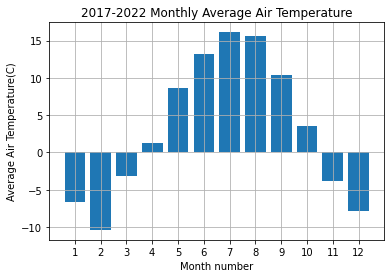

In [28]:
months = range(1, 13)
plt.bar(months, results['Air Temp Avg'] )
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Average Air Temperature(C)')
plt.title('2017-2022 Monthly Average Air Temperature')
plt.grid()
plt.show()

## Q2: Which month has the highest humidity?

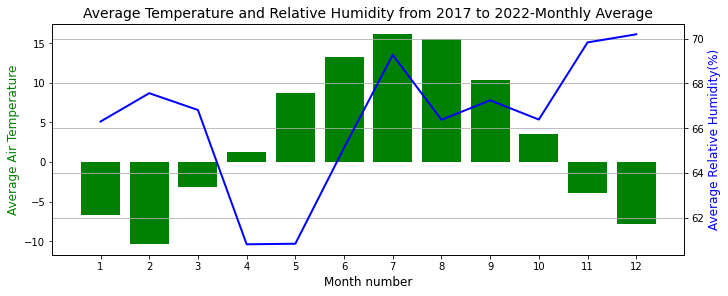

In [29]:
humidity_avg = all_data.groupby('nMonth').mean()['Relative Humidity Avg']

fig, ax1 = plt.subplots(figsize=(10, 4), layout='constrained')

ax2 = ax1.twinx()
ax1.bar(months, results['Air Temp Avg'], color = 'g')
ax2.plot(months, results['Relative Humidity Avg'], 'b-', linewidth = 2)
plt.xticks(months, size = 12)

ax1.set_xlabel('Month number', size = 12)
ax1.set_ylabel('Average Air Temperature', color = 'g', size = 12)
ax2.set_ylabel('Average Relative Humidity(%)', color='b', size = 12)
plt.title('Average Temperature and Relative Humidity from 2017 to 2022-Monthly Average', size = 14)
plt.grid()

plt.show()


## Q3: Min, Max and Avg air temperature for year 2017 to 2022 - monthly

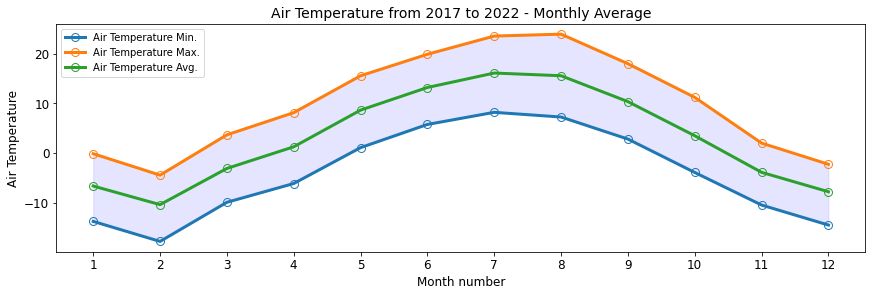

In [30]:
temp_group = all_data.groupby('nMonth')

fig, ax = plt.subplots(figsize=(12, 4), layout='constrained')

air_temp_min = temp_group.mean()['Air Temp Min']
air_temp_max = temp_group.mean()['Air Temp Max']
air_temp_avg = temp_group.mean()['Air Temp Avg']

months = range(1, 13)
plt.plot(months, air_temp_min, linewidth=3,marker = 'o', markerfacecolor = 'none', markersize = 8, label = 'Air Temperature Min.')
plt.plot(months, air_temp_max, linewidth=3, marker = 'o', markerfacecolor = 'none', markersize = 8, label = 'Air Temperature Max.')
plt.plot(months, air_temp_avg, linewidth=3, marker = 'o', markerfacecolor = 'none', markersize = 8, label ='Air Temperature Avg.')

plt.xticks(months, size = 12)
plt.yticks(size = 12)
plt.xlabel('Month number', size = 12)
plt.ylabel('Air Temperature', size =12)
plt.title('Air Temperature from 2017 to 2022 - Monthly Average', size = 14)
plt.legend(loc="upper left")

ax.fill_between(months, air_temp_min, air_temp_max, color = 'blue', alpha = 0.1)
plt.show()

## Q4: Daily Average Air Temperature in Year 2022

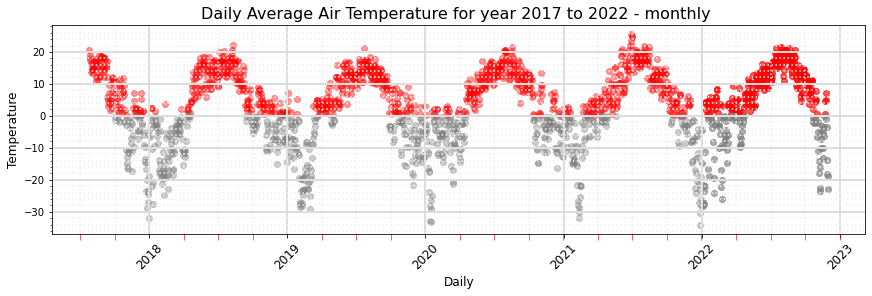

In [31]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
                               
fig, ax = plt.subplots(figsize=(12, 4), layout='constrained')

all_data1 = all_data[all_data['Air Temp Avg'] > 0]
all_data2 = all_data[all_data['Air Temp Avg'] <= 0]

x1 = pd.to_datetime(all_data1['Date'])
x2 = pd.to_datetime(all_data2['Date'])
y1 = all_data1['Air Temp Avg']
y2 = all_data2['Air Temp Avg']


plt.scatter(x1, y1, color = 'red', alpha = 0.4)
plt.scatter(x2, y2, color = 'grey', alpha = 0.4)

plt.title('Daily Average Air Temperature for year 2017 to 2022 - monthly ', size = 16)
plt.xlabel('Daily', size = 12)
plt.ylabel('Temperature', size = 12)
plt.xticks(rotation = 45, size = 12)
,
plt.tick_params(axis="x", which="minor",length=6, color="r")
minor_locator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minor_locator)

ax.grid(which='major', color='#DDDDDD', linewidth=2.0)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)
ax.minorticks_on()

plt.show()

## Q5: Temperature, wind speed, humidity, precipitation and frost probability plots

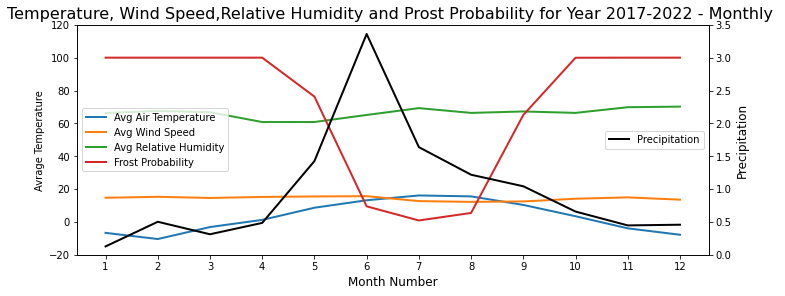

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 4), layout='constrained')

Group = all_data.groupby('nMonth').mean()
x = range(1, 13)
ax2 = ax1.twinx()

y_avg_temp = Group['Air Temp Avg']
y_avg_wind_speed = Group['Wind Speed 10 m Avg']
y_avg_relative_humidity = Group['Relative Humidity Avg']
y_frost_probability = Group['Frost Probability']
y_precip = Group['Precip']

ax1.plot(x, y_avg_temp, label = 'Avg Air Temperature', linewidth = 2)
ax1.plot(x, y_avg_wind_speed, label ='Avg Wind Speed', linewidth = 2 )
ax1.plot(x, y_avg_relative_humidity, label = 'Avg Relative Humidity', linewidth = 2 )
ax1.plot(x, y_frost_probability, label = 'Frost Probability', linewidth = 2)
ax1.set_ylim(-20, 120)

ax2.plot(x, y_precip, label ='Precipitation', color = 'black', linewidth = 2)
ax2.set_ylim(0, 3.5)

plt.xticks(x, size = 12)
ax1.set_xlabel('Month Number', size = 12)  
ax1.set_ylabel('Avrage Temperature')
ax2.set_ylabel('Precipitation', size = 12)

ax1.set_title("Temperature, Wind Speed,Relative Humidity and Prost Probability for Year 2017-2022 - Monthly ", size = 16)  
ax1.legend(loc = 'center left')

ax2.legend(loc = 'center right')

plt.show()


# The End